<a href="https://colab.research.google.com/github/sduvvur7/DL/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'


raw_dataset = pd.read_csv(url,na_values='?', comment='\t',
                          sep=',')

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset = pd.get_dummies(dataset, columns=['ocean_proximity'], prefix='', prefix_sep='')
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,0,1,0,0,0


In [ ]:
#split into test and train datset
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

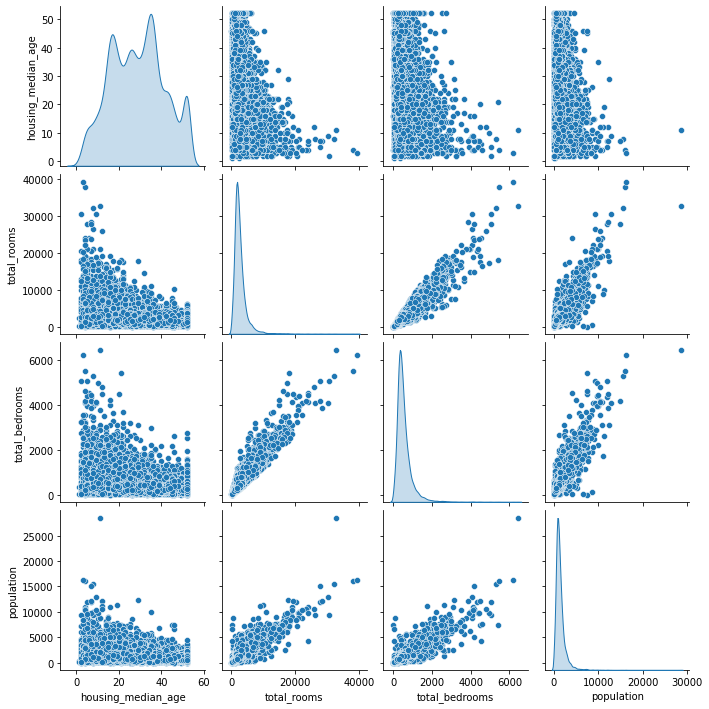

In [ ]:
#inspect the data
sns.pairplot(train_dataset[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,16346.0,-119.564154,2.002618,-124.3500,-121.790000,-118.4900,-118.000000,-114.4700
latitude,16346.0,35.630318,2.138574,32.5500,33.930000,34.2500,37.710000,41.9500
housing_median_age,16346.0,28.664505,12.556764,1.0000,18.000000,29.0000,37.000000,52.0000
total_rooms,16346.0,2622.235776,2169.548287,11.0000,1448.000000,2119.0000,3120.750000,39320.0000
total_bedrooms,16346.0,535.281659,418.469078,3.0000,296.000000,432.5000,644.000000,6445.0000
population,16346.0,1416.087055,1103.842065,3.0000,784.250000,1164.0000,1711.000000,28566.0000
households,16346.0,496.758167,379.109535,3.0000,280.000000,408.0000,600.000000,6082.0000
median_income,16346.0,3.869337,1.902228,0.4999,2.555675,3.5332,4.744225,15.0001
median_house_value,16346.0,206916.154411,115676.394484,14999.0000,119300.000000,179700.0000,265900.000000,500001.0000
<1H OCEAN,16346.0,0.441454,0.496576,0.0000,0.000000,0.0000,1.000000,1.0000


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('median_house_value')
test_labels = test_features.pop('median_house_value')

In [ ]:
#normalization
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
longitude,-119.564154,2.002618
latitude,35.630318,2.138574
housing_median_age,28.664505,12.556764
total_rooms,2622.235776,2169.548287
total_bedrooms,535.281659,418.469078
population,1416.087055,1103.842065
households,496.758167,379.109535
median_income,3.869337,1.902228
median_house_value,206916.154411,115676.394484
<1H OCEAN,0.441454,0.496576


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[-119.564   35.63    28.664 2622.236  535.282 1416.088  496.758    3.869
     0.441    0.319    0.       0.11     0.129]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[-117.08   32.7    37.   2176.    418.   1301.    375.      2.88    0.
     0.      0.      0.      1.  ]]

Normalized: [[ 1.24 -1.37  0.66 -0.21 -0.28 -0.1  -0.32 -0.52 -0.89 -0.69 -0.02 -0.35
   2.6 ]]


In [80]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  
  plt.xlabel('Epoch')
  plt.ylabel('Error [Target]')
  plt.legend()
  plt.grid(True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_88 (Dense)            (None, 4)                 56        
                                                                 
 dense_89 (Dense)            (None, 4)                 20        
                                                                 
 dense_90 (Dense)            (None, 4)                 20        
                                                                 
 dense_91 (Dense)            (None, 1)                 5         
                                                                 
Total params: 128
Trainable params: 101
Non-trainable params: 27
______________________________________________________

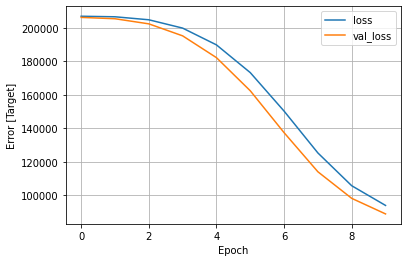

In [89]:
#Regression using a DNN and multiple inputs
#neuron value = 4

test_results = {}
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(4, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=10)

plot_loss(history)




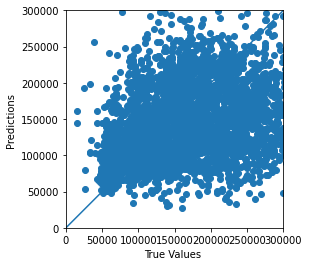

In [90]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 300000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


,Mean absolute error [Mean_housing_value]
dnn_model,90102.929688
reloaded,90102.929688


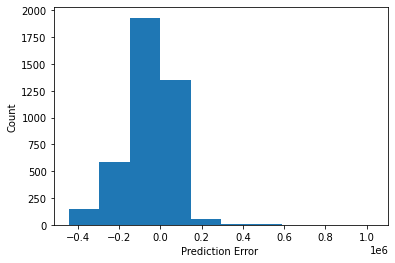

In [91]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_104 (Dense)           (None, 8)                 112       
                                                                 
 dense_105 (Dense)           (None, 8)                 72        
                                                                 
 dense_106 (Dense)           (None, 8)                 72        
                                                                 
 dense_107 (Dense)           (None, 1)                 9         
                                                                 
Total params: 292
Trainable params: 265
Non-trainable params: 27
______________________________________________________

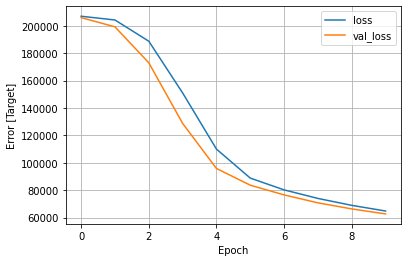

In [100]:
#Regression using a DNN and multiple inputs
#neuron value = 8 
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=10)

plot_loss(history)




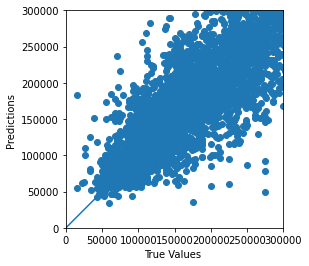

In [97]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 300000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


,Mean absolute error [Mean_housing_value]
dnn_model,44958.972656
reloaded,44958.972656


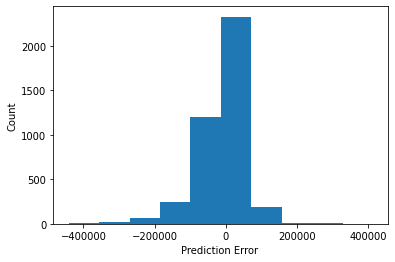

In [98]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_116 (Dense)           (None, 16)                224       
                                                                 
 dense_117 (Dense)           (None, 16)                272       
                                                                 
 dense_118 (Dense)           (None, 16)                272       
                                                                 
 dense_119 (Dense)           (None, 1)                 17        
                                                                 
Total params: 812
Trainable params: 785
Non-trainable params: 27
______________________________________________________

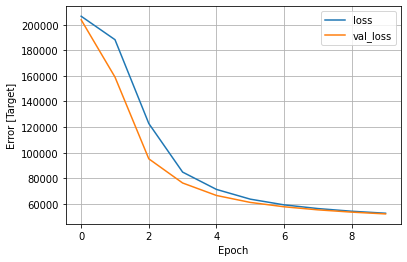

In [110]:
#Regression using a DNN and multiple inputs
#neuron value = 16
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=10)

plot_loss(history)

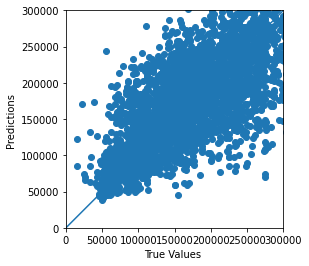

In [111]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 300000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,52338.339844
reloaded,52338.339844


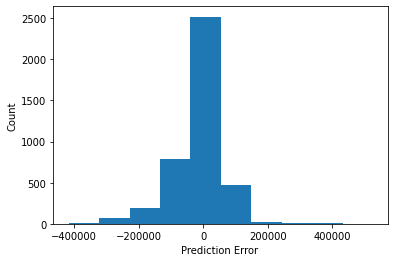

In [112]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_120 (Dense)           (None, 32)                448       
                                                                 
 dense_121 (Dense)           (None, 32)                1056      
                                                                 
 dense_122 (Dense)           (None, 32)                1056      
                                                                 
 dense_123 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,620
Trainable params: 2,593
Non-trainable params: 27
__________________________________________________

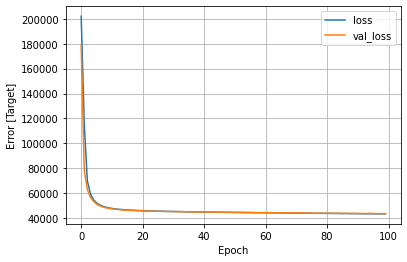

In [114]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)





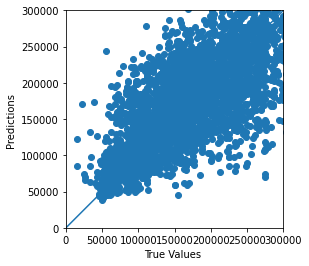

In [113]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 300000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,43867.156250
reloaded,43016.304688


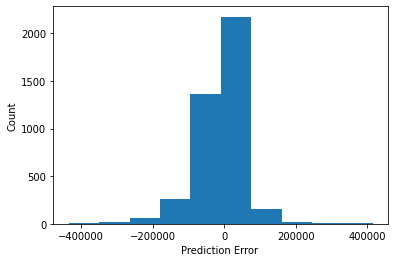

In [118]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_140 (Dense)           (None, 64)                896       
                                                                 
 dense_141 (Dense)           (None, 64)                4160      
                                                                 
 dense_142 (Dense)           (None, 64)                4160      
                                                                 
 dense_143 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,308
Trainable params: 9,281
Non-trainable params: 27
__________________________________________________

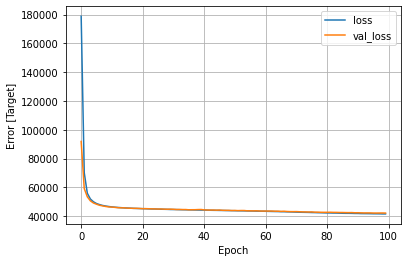

In [131]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)






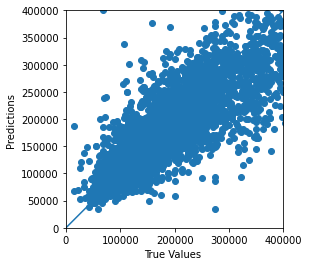

In [116]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 400000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,206653.453125
reloaded,42218.445312


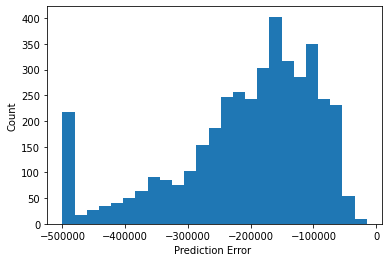

In [132]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_112 (Dense)           (None, 200)               2800      
                                                                 
 dense_113 (Dense)           (None, 60)                12060     
                                                                 
 dense_114 (Dense)           (None, 12)                732       
                                                                 
 dense_115 (Dense)           (None, 1)                 13        
                                                                 
Total params: 15,632
Trainable params: 15,605
Non-trainable params: 27
________________________________________________

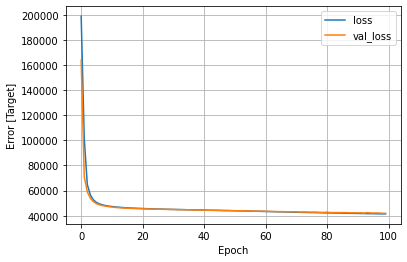

In [105]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(200, activation='relu'),
      layers.Dense(60, activation='relu'),
      layers.Dense(12, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)





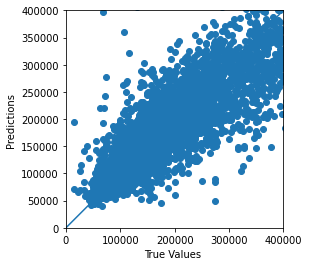

In [106]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 400000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,41971.6875
reloaded,41971.6875


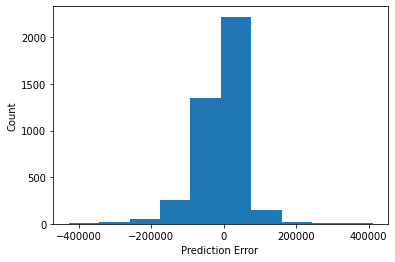

In [108]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_108 (Dense)           (None, 5)                 70        
                                                                 
 dense_109 (Dense)           (None, 80)                480       
                                                                 
 dense_110 (Dense)           (None, 150)               12150     
                                                                 
 dense_111 (Dense)           (None, 1)                 151       
                                                                 
Total params: 12,878
Trainable params: 12,851
Non-trainable params: 27
________________________________________________

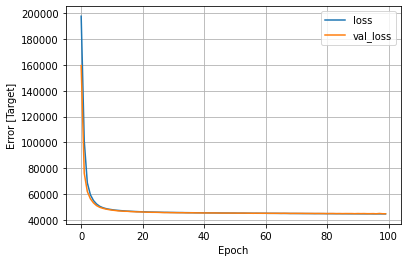

In [102]:
#Regression using a DNN and multiple inputs
#Regression using multiple neuron values

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(5, activation='relu'),
      layers.Dense(80, activation='relu'),
      layers.Dense(150, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)






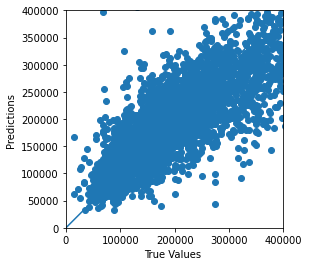

In [103]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 400000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,44940.820312
reloaded,44940.820312


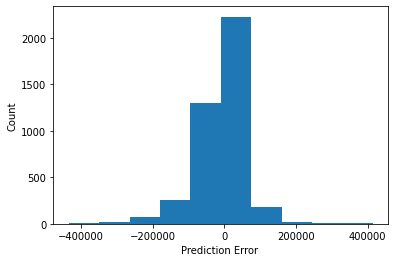

In [104]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_136 (Dense)           (None, 2)                 28        
                                                                 
 dense_137 (Dense)           (None, 2)                 6         
                                                                 
 dense_138 (Dense)           (None, 2)                 6         
                                                                 
 dense_139 (Dense)           (None, 1)                 3         
                                                                 
Total params: 70
Trainable params: 43
Non-trainable params: 27
________________________________________________________

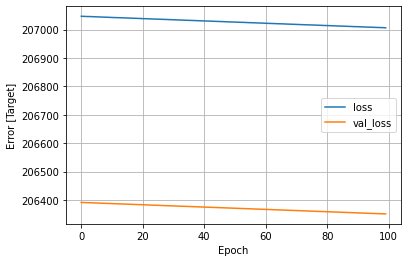

In [130]:
#Regression using a DNN and multiple inputs
#Regression using multiple neuron values

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(2, activation='relu'),
      layers.Dense(2, activation='relu'),
      layers.Dense(2, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)


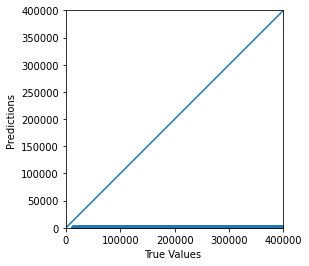

In [127]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error ']).T


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 400000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

,Mean absolute error [Mean_housing_value]
dnn_model,206653.453125
reloaded,206653.453125


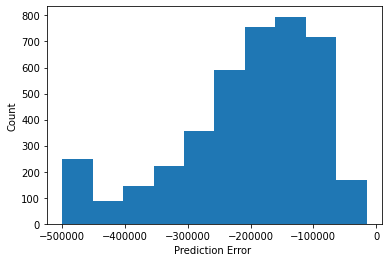

In [129]:
error = test_predictions - test_labels
plt.hist(error)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')
dnn_model.save('dnn_model')

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


pd.DataFrame(test_results, index=['Mean absolute error [Mean_housing_value]']).T